# ML-Фреймворк LightGBM для градиентного бустинга

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import sklearn

import warnings
warnings.filterwarnings("ignore")

print("Версия LightGBM      : ", lgb.__version__)
print("Версия Scikit-Learn  : ", sklearn.__version__)

Версия LightGBM      :  3.2.1
Версия Scikit-Learn  :  0.21.2


In [4]:
# Датасет boston_housing для решения задачи РЕГРЕССИИ

from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Датасет Breast Cancer для БИНАРНОЙ классификации

from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

breast_cancer_df.head()

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
            

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Датасет Wine для задачи МУЛЬТИКЛАССОВОЙ классификации

from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df["WineType"] = wine.target

wine_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Обучение модели линейной регрессии с бустингом

In [7]:
# Создаем 10 деревьев
# В качестве функции потерь используется l2
# (по умолчанию lightgbm минимизирует потерю l2 для задачи регрессии)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

booster = lgb.train({"objective": "regression"},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

Размеры Train/Test:  (379, 13) (127, 13) (379,) (127,)
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.877836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 63.6962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 54.9488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 47.9305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 42.3835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 37.5934
[LightGBM] [Warning] No further s

In [8]:
from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("Test  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Test  R2 Score : 0.67
Train R2 Score : 0.76


### Изучаем предсказания + важность параметров

Параметры, которые можно передать в booster.predict():

raw_score — это логический параметр, при котором, если он установлен в True, результатом выполнения будут необработанные прогнозы. Для задач регрессии это не имеет никакого значения, но при классификации predict вернет значения функции, а не вероятности.

pred_leaf — этот параметр принимает логические значения. Если задано True, то будет возвращаться индекс листа каждого дерева, который был спрогнозирован для конкретного семпла. Размер вывода будет n_samples x n_trees.

pred_contrib — возвращает массив показателей для каждого наблюдения. Результатом будет являться массив размера (n_features + 1) для каждого семпла, где последнее значение является ожидаемым значением, а первые n_features являются вкладом показателей в этот прогноз. Мы можем добавить вклад каждого показателя к последнему ожидаемому значению и получить фактический прогноз. Обычно такие значения называют SHAP.

In [9]:
idxs = booster.predict(X_test, pred_leaf=True)

print("Размерность: ", idxs.shape)

idxs

Размерность:  (127, 10)


array([[13, 12,  4, ...,  6,  1,  6],
       [15, 15, 14, ..., 13,  6, 14],
       [ 4,  4, 12, ..., 12,  1, 10],
       ...,
       [ 6,  6,  6, ...,  4,  4,  5],
       [10, 10,  2, ...,  5,  9, 14],
       [ 2,  2,  2, ...,  2,  2,  3]], dtype=int32)

In [10]:
shap_vals = booster.predict(X_test, pred_contrib=True)

print("Размерность: ", shap_vals.shape)

print("\nЗначения Shap для нулевого семпла: ", shap_vals[0])
print("\nПредсказания с использованием значений SHAP: ", shap_vals[0].sum())
print("Предсказания без SHAP: ", test_preds[0])

Размерность:  (127, 14)

Значения Shap для нулевого семпла:  [ 0.03411909  0.         -0.09411227  0.          0.23168974 -1.58598204
  0.02683302 -0.02883977 -0.24755575 -0.10835765  0.47391561  0.13381518
 -0.41855202 22.87783647]

Предсказания с использованием значений SHAP:  21.29480960320953
Предсказания без SHAP:  21.29480960320953


In [11]:
# Кол-во деревьев бустинга
booster.num_trees()

10

In [13]:
# важность признаков на основе значений выигрыша - importance_type="gain"
# важность признаков на основе значений разделения - importance_type="split"
booster.feature_importance(importance_type="gain"), booster.feature_importance(importance_type="split")

(array([  971.16069794,     0.        ,   576.52338791,     0.        ,
         2375.9596138 , 66732.33864212,   509.78182697,  1508.20930481,
         1165.06179047,  1243.87712288,  2003.18970299,   451.41620636,
        55541.50243187]),
 array([10,  0,  6,  0, 11, 27,  8,  6,  5,  9, 10,  5, 45], dtype=int32))

## Бинарная классификация

In [14]:
# "objective": "binary" - бинарная классификация
# verbosity -1, чтобы предотвратить вывод сообщений во время обучения.

# Мы можем добавить параметр metric в словарь, который передается методу train(),
# с названиями любых метрик, доступных в lightgbm

#По умолчанию при решении задач бинарной классификации LightGBM использует
# для оценки бинарную логистическую функцию потери на проверочной выборке.

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())


booster = lgb.train({"objective": "binary", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

from sklearn.metrics import accuracy_score


test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

# Изначально возвращаются вероятности, которые надо преоразовать в целевой класс
test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("Test Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.588043
[2]	valid_0's binary_logloss: 0.525273
[3]	valid_0's binary_logloss: 0.471976
[4]	valid_0's binary_logloss: 0.428868
[5]	valid_0's binary_logloss: 0.389895
[6]	valid_0's binary_logloss: 0.3568
[7]	valid_0's binary_logloss: 0.327469
[8]	valid_0's binary_logloss: 0.302014
[9]	valid_0's binary_logloss: 0.28165
[10]	valid_0's binary_logloss: 0.261689
Test Accuracy: 0.95
Train Accuracy: 0.97


## Мультиклассовая классификация

In [15]:
# "objective": "multiclass" - мультиклассовая классификация

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=wine.feature_names)
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=wine.feature_names)


booster = lgb.train({"objective": "multiclass", "num_class":3, "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

from sklearn.metrics import accuracy_score

# Метод predict() возвращает вероятности для каждого класса в случае мультиклассовых задач
test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

# Мы добавили логику для выбора класса с наибольшим значением вероятности в качестве фактического предсказания.
test_preds = np.argmax(test_preds, axis=1)
train_preds = np.argmax(train_preds, axis=1)

print("\nTest Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (133, 13) (45, 13) (133,) (45,)
[1]	valid_0's multi_logloss: 0.95201
[2]	valid_0's multi_logloss: 0.841977
[3]	valid_0's multi_logloss: 0.757642
[4]	valid_0's multi_logloss: 0.686874
[5]	valid_0's multi_logloss: 0.627052
[6]	valid_0's multi_logloss: 0.574901
[7]	valid_0's multi_logloss: 0.52574
[8]	valid_0's multi_logloss: 0.486469
[9]	valid_0's multi_logloss: 0.456461
[10]	valid_0's multi_logloss: 0.42315

Test Accuracy: 0.96
Train Accuracy: 1.00


## Некоторые настройки LigthGBM

objective — этот параметр позволяет нам определить целевую функцию, используемую для текущей задачи.
Его значением по умолчанию является regression.
Ниже приведен список часто используемых значений этого параметра.

    regression
    regression_l1
    tweedie
    binary
    multiclass
    multiclassova
    cross_entropy
    
Полный список:
https://lightgbm.readthedocs.io/en/latest/Parameters.html#objective

metric — данный параметр принимает метрики для расчета на оценочных наборах данных (в случае если эти выборки предоставлены как значение параметра eval_set/validation_sets). Мы можем предоставить более одной метрики, и все они будут посчитаны на проверочных датасетах. Ниже приведен список наиболее часто используемых значений этого параметра.

    rmse
    l2
    l1
    tweedie
    binary_logloss
    multi_logloss
    auc
    cross_entropy
    
Полный список:
https://lightgbm.readthedocs.io/en/latest/Parameters.html#metric

boosting — этот параметр принимает одну из нижеперечисленных строк, определяющих, какой алгоритм использовать.

    gbdt — значение по умолчанию. Дерево решений с градиентным бустингом
    rf — Случайный лес
    dart — Dropout на множественных аддитивных регрессионных деревьях
    goss — Односторонняя выборка на основе градиента

num_iterations — данный параметр является псевдонимом для num_boost_round, который позволяет нам указать число деревьев в ансамбле для создания оценщика. По умолчанию 100.

learning_rate — этот параметр используется для определения скорости обучения. По умолчанию 0.1.

num_class — если мы работаем с задачей мультиклассовой классификации, то этот параметр должен содержать количество классов.

num_leaves — данный параметр принимает целое число, определяющее максимальное количество листьев, разрешенное для каждого дерева. По умолчанию 31.

num_threads — принимает целое число, указывающее количество потоков, используемых для обучения. Мы можем установить его равным числу ядер системы.

seed — позволяет нам указать инициализирующее значение для процесса обучения, что предоставляет нам возможность повторно генерировать те же результаты.

max_depth — этот параметр позволяет нам указать максимальную глубину, разрешенную для деревьев в ансамбле. По умолчанию -1, что позволяет деревьям расти как можно глубже. Мы можем ограничить это поведение, установив этот параметр.

min_data_in_leaf — данный параметр принимает целочисленное значение, определяющее минимальное количество точек данных (семплов), которые могут храниться в одном листе дерева. Этот параметр можно использовать для контроля переобучения. Значение по умолчанию 20.

bagging_fraction — этот параметр принимает значение с плавающей запятой от 0 до 1, которое позволяет указать, насколько большая часть данных будет случайно отбираться при обучении. Этот параметр может помочь предотвратить переобучение. По умолчанию 1.0.

feature_fraction — данный параметр принимает значение с плавающей запятой от 0 до 1, которое информирует алгоритм о выборе этой доли показателей из общего числа для обучения на каждой итерации. По умолчанию 1.0, поэтому используются все показатели.

extra_trees — этот параметр принимает логические значения, определяющие, следует ли использовать чрезвычайно рандомизированное дерево или нет.

early_stopping_round — принимает целое число, указывающее, что мы должны остановить обучение, если оценочная метрика, рассчитанная на последнем проверочном датасете, не улучшается на протяжении определенного параметром числа итераций.

monotone_constraints — этот параметр позволяет нам указать, должна ли наша модель обеспечивать увеличение, уменьшение или отсутствие связи отдельного показателя с целевым значением. Использование данного параметра объясняется в разделе «Монотонные ограничения».

monotone_constraints_method — этот параметр принимает одну из нижеперечисленных строк, определяющих тип накладываемых монотонных ограничений.

    basic — базовый метод монотонных ограничений, который может чрезмерно ограничивать модель.
    intermediate — это более сложный метод ограничений, который немного менее ограничивает, чем базовый метод, но может занять больше времени.
    advanced — это расширенный метод ограничений, который менее ограничивает, чем базовый и промежуточный методы, но может занять больше времени.

interaction_constraints — этот параметр принимает список списков, в которых отдельные списки определяют индексы показателей, которым разрешено взаимодействовать друг с другом. Такое взаимодействие подробно объясняется в разделе «Ограничения взаимодействия показателей».

verbosity — этот параметр принимает целочисленное значение для управления логированием сообщений при обучении.

    < 0 — отображаются только фатальные ошибки.

    0 — отображаются сообщения об ошибках/предупреждениях и перечисленные выше.
    1 — отображаются информационные сообщения и перечисленные выше.
    > 1 — отображается отладочная информация и перечисленные выше.

is_unbalance — это логический параметр, который должен иметь значение True, если данные не сбалансированы. Его следует использовать с задачами бинарной и мультиклассовой классификации.

device_type — принимает одну из следующих строк, определяющих тип используемого для обучения оборудования.

    cpu
    gpu
    cuda

force_col_wise — этот параметр принимает логическое значение, определяющее, следует ли принудительно строить гистограмму по столбцам при обучении. Если в данных слишком много столбцов, установка для этого параметра значения True повысит скорость процесса обучения за счет уменьшения использования памяти.

force_row_wise — этот параметр принимает логическое значение, определяющее, следует ли принудительно строить гистограмму по строкам при обучении. Если в данных слишком много строк, установка для этого параметра значения True повысит скорость процесса обучения за счет уменьшения использования памяти.

Полный список:
https://lightgbm.readthedocs.io/en/latest/Parameters.html

# LGBMModel

Класс LGBMModel — это обертка для класса Booster, которая предоставляет подобный scikit-learn API для обучения и прогнозирования в lightgbm. Он позволяет нам создать объект оценщика со списком параметров в качестве входных данных. Затем мы можем вызвать метод fit() для обучения, передав ему тренировочные данные, и метод predict() для предсказания. 

## Регрессия

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="regression", n_estimators=10)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric="rmse")

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

Размеры Train/Test Sizes:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 6.95002	valid_0's l2: 48.3028
[2]	valid_0's rmse: 6.45893	valid_0's l2: 41.7178
[3]	valid_0's rmse: 6.04473	valid_0's l2: 36.5388
[4]	valid_0's rmse: 5.65647	valid_0's l2: 31.9957
[5]	valid_0's rmse: 5.32339	valid_0's l2: 28.3384
[6]	valid_0's rmse: 5.03996	valid_0's l2: 25.4012
[7]	valid_0's rmse: 4.78806	valid_0's l2: 22.9256
[8]	valid_0's rmse: 4.56714	valid_0's l2: 20.8587
[9]	valid_0's rmse: 4.40139	valid_0's l2: 19.3722
[10]	valid_0's rmse: 4.25004	valid_0's l2: 18.0628

Test  R2 Score: 0.68
Train R2 Score: 0.75


## Бинарная классификация

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=10,)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("Test  Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test Sizes:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.559123
[2]	valid_0's binary_logloss: 0.499562
[3]	valid_0's binary_logloss: 0.446627
[4]	valid_0's binary_logloss: 0.405819
[5]	valid_0's binary_logloss: 0.370929
[6]	valid_0's binary_logloss: 0.3405
[7]	valid_0's binary_logloss: 0.314533
[8]	valid_0's binary_logloss: 0.290689
[9]	valid_0's binary_logloss: 0.269446
[10]	valid_0's binary_logloss: 0.251264
Test  Accuracy: 0.96
Train Accuracy: 0.98


## LGBMRegressor

LGBMRegressor — еще одна обертка-оценщик вокруг класса Booster, предоставляемая lightgbm и имеющая тот же API, что и у оценщиков sklearn. Как следует из названия, он предназначен для задач регрессии.

LGBMRegressor почти такой же, как LGBMModel, с той лишь разницей, что он предназначен только для задач регрессии

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMRegressor(objective="regression_l2", n_estimators=10,)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric=["rmse", "l2", "l1"])

print("Test  R2 Score: %.2f"%booster.score(X_train, Y_train))
print("Train R2 Score: %.2f"%booster.score(X_test, Y_test))

Размеры Train/Test Sizes:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 10.0409	valid_0's l2: 100.82	valid_0's l1: 7.29365
[2]	valid_0's rmse: 9.37562	valid_0's l2: 87.9023	valid_0's l1: 6.77938
[3]	valid_0's rmse: 8.7746	valid_0's l2: 76.9936	valid_0's l1: 6.2945
[4]	valid_0's rmse: 8.27848	valid_0's l2: 68.5332	valid_0's l1: 5.89842
[5]	valid_0's rmse: 7.82875	valid_0's l2: 61.2894	valid_0's l1: 5.52463
[6]	valid_0's rmse: 7.43684	valid_0's l2: 55.3066	valid_0's l1: 5.21923
[7]	valid_0's rmse: 7.05676	valid_0's l2: 49.7979	valid_0's l1: 4.91182
[8]	valid_0's rmse: 6.70135	valid_0's l2: 44.908	valid_0's l1: 4.61443
[9]	valid_0's rmse: 6.41984	valid_0's l2: 41.2143	valid_0's l1: 4.35352
[10]	valid_0's rmse: 6.15083	valid_0's l2: 37.8328	valid_0's l1: 4.1248
Test  R2 Score: 0.74
Train R2 Score: 0.66


## LGBMClassifier

LGBMClassifier — еще одна обертка-оценщик вокруг класса Booster, которая предоставляет API, подобный sklearn, для задач классификации. Он работает точно так же, как LGBMModel, но только для задач классификации.

## Бинарная классификация

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)
booster = lgb.LGBMClassifier(objective="binary", n_estimators=10)
booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

print("Test  Accuracy: %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy: %.2f"%booster.score(X_train, Y_train))

[1]	valid_0's binary_logloss: 0.569052
[2]	valid_0's binary_logloss: 0.508516
[3]	valid_0's binary_logloss: 0.46316
[4]	valid_0's binary_logloss: 0.420399
[5]	valid_0's binary_logloss: 0.383049
[6]	valid_0's binary_logloss: 0.351867
[7]	valid_0's binary_logloss: 0.323983
[8]	valid_0's binary_logloss: 0.299839
[9]	valid_0's binary_logloss: 0.277053
[10]	valid_0's binary_logloss: 0.257138
Test  Accuracy: 0.94
Train Accuracy: 0.97


## Мультиклассовая классификация

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)
booster = lgb.LGBMClassifier(objective="multiclassova", n_estimators=10, num_class=3)
booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

print("Test  Accuracy: %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy: %.2f"%booster.score(X_train, Y_train))

[1]	valid_0's multi_logloss: 0.947685
[2]	valid_0's multi_logloss: 0.860289
[3]	valid_0's multi_logloss: 0.779154
[4]	valid_0's multi_logloss: 0.720849
[5]	valid_0's multi_logloss: 0.675284
[6]	valid_0's multi_logloss: 0.630248
[7]	valid_0's multi_logloss: 0.592315
[8]	valid_0's multi_logloss: 0.56565
[9]	valid_0's multi_logloss: 0.530469
[10]	valid_0's multi_logloss: 0.508687
Test  Accuracy: 0.96
Train Accuracy: 1.00


## Сохранение и загрузка модели

    save_model() — этот метод принимает имя файла, в котором сохраняется модель.
    
    model_to_string() — данный метод возвращает строковое представление модели, которое мы затем можем сохранить в текстовый файл.
   
    lightgbm.Booster() — этот конструктор позволяет нам создать экземпляр класса Booster. У него есть два важных параметра, которые могут помочь нам загрузить модель из файла или из строки.
        
        model_file — этот параметр принимает имя файла, из которого загружается обученная модель.
        
        model_str — данный параметр принимает строку, содержащую информацию об обученной модели. Нам нужно передать этому параметру строку, которая была сгенерирована с помощью model_to_string() после загрузки из файла.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

booster = lgb.train({"objective": "regression", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    verbose_eval=False,
                    feature_name=boston.feature_names.tolist(),
                    num_boost_round=10)

booster.save_model("lgb.model")

In [23]:
loaded_booster = lgb.Booster(model_file="lgb.model")
test_preds = loaded_booster.predict(X_test)
train_preds = loaded_booster.predict(X_train)

print("Test  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

Test  R2 Score: 0.69
Train R2 Score: 0.75


## Кросс-валидация

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit


X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())

lgb.cv({"objective": "binary", "verbosity": -1},
       train_set=test_dataset, num_boost_round=10,
       nfold=5, stratified=True, shuffle=True,
       verbose_eval=True)

cv_output = lgb.cv({"objective": "binary", "verbosity": -1},
                   train_set=test_dataset, num_boost_round=10,
                   metrics=["auc", "average_precision"],
                   folds=StratifiedShuffleSplit(n_splits=3),
                   verbose_eval=True,
                   return_cvbooster=True)

for key, val in cv_output.items():
    print("\n" + key, " : ", val)

[1]	cv_agg's binary_logloss: 0.581476 + 0.00564412
[2]	cv_agg's binary_logloss: 0.528245 + 0.010635
[3]	cv_agg's binary_logloss: 0.48031 + 0.0130702
[4]	cv_agg's binary_logloss: 0.443169 + 0.0185618
[5]	cv_agg's binary_logloss: 0.408328 + 0.0184916
[6]	cv_agg's binary_logloss: 0.376805 + 0.0208253
[7]	cv_agg's binary_logloss: 0.354632 + 0.0221434
[8]	cv_agg's binary_logloss: 0.331299 + 0.024907
[9]	cv_agg's binary_logloss: 0.311582 + 0.0277387
[10]	cv_agg's binary_logloss: 0.293714 + 0.0308274
[1]	cv_agg's auc: 0.97 + 0.0141421	cv_agg's average_precision: 0.976768 + 0.00714249
[2]	cv_agg's auc: 0.976667 + 0.020548	cv_agg's average_precision: 0.982828 + 0.013627
[3]	cv_agg's auc: 0.976667 + 0.020548	cv_agg's average_precision: 0.982828 + 0.013627
[4]	cv_agg's auc: 0.993333 + 0.00942809	cv_agg's average_precision: 0.993939 + 0.00857099
[5]	cv_agg's auc: 1 + 0	cv_agg's average_precision: 1 + 0
[6]	cv_agg's auc: 1 + 0	cv_agg's average_precision: 1 + 0
[7]	cv_agg's auc: 1 + 0	cv_agg's avera

## Построение графиков

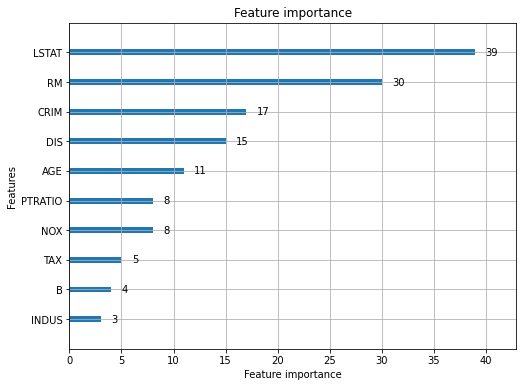

In [25]:
lgb.plot_importance(booster, figsize=(8,6));

[1]	Validation Set's rmse: 7.32589	Validation Set's l2: 53.6687
[2]	Validation Set's rmse: 6.63512	Validation Set's l2: 44.0249
[3]	Validation Set's rmse: 6.04117	Validation Set's l2: 36.4957
[4]	Validation Set's rmse: 5.50287	Validation Set's l2: 30.2815
[5]	Validation Set's rmse: 5.06509	Validation Set's l2: 25.6551
[6]	Validation Set's rmse: 4.66406	Validation Set's l2: 21.7534
[7]	Validation Set's rmse: 4.35394	Validation Set's l2: 18.9568
[8]	Validation Set's rmse: 4.05992	Validation Set's l2: 16.4829
[9]	Validation Set's rmse: 3.84355	Validation Set's l2: 14.7729
[10]	Validation Set's rmse: 3.65108	Validation Set's l2: 13.3304


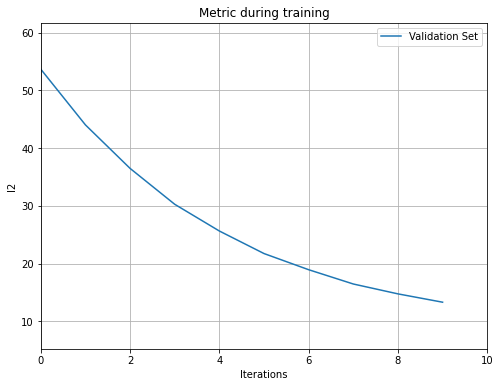

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)
booster = lgb.LGBMModel(objective="regression", n_estimators=10,)
booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse", eval_names = ["Validation Set"],
            feature_name=boston.feature_names.tolist()
           )

lgb.plot_metric(booster, figsize=(8,6));

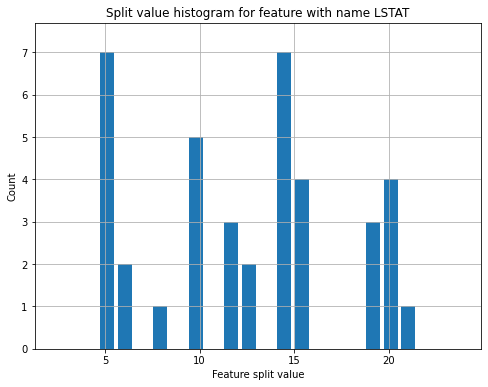

In [27]:
# split - количество раз каждый показатель использовался для разбиения
lgb.plot_split_value_histogram(booster, feature="LSTAT", figsize=(8,6));

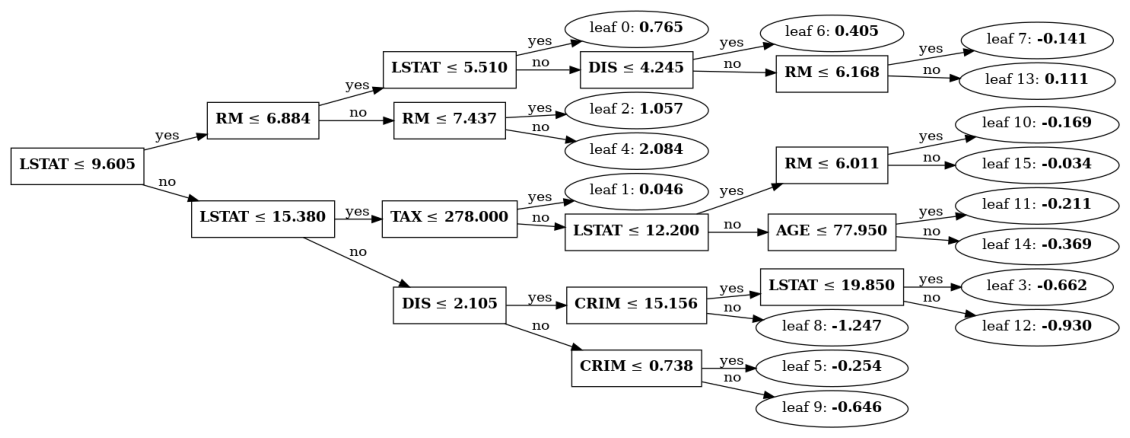

In [30]:
 lgb.plot_tree(booster, tree_index = 1, figsize=(20,12));

## Ранняя остановка обучения

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=100, metric="auc")

booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),],
            early_stopping_rounds=3)

from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("Test  Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's auc: 0.952557
Training until validation scores don't improve for 3 rounds
[2]	valid_0's auc: 0.952768
[3]	valid_0's auc: 0.952663
[4]	valid_0's auc: 0.966716
[5]	valid_0's auc: 0.970203
[6]	valid_0's auc: 0.968618
[7]	valid_0's auc: 0.970414
[8]	valid_0's auc: 0.970414
[9]	valid_0's auc: 0.971048
[10]	valid_0's auc: 0.969358
[11]	valid_0's auc: 0.985418
[12]	valid_0's auc: 0.983728
[13]	valid_0's auc: 0.985207
[14]	valid_0's auc: 0.98563
[15]	valid_0's auc: 0.984784
[16]	valid_0's auc: 0.984996
[17]	valid_0's auc: 0.98563
Early stopping, best iteration is:
[14]	valid_0's auc: 0.98563
Test  Accuracy: 0.96
Train Accuracy: 0.98


## Ограничения взаимодействия показателей

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, train_size=0.90, random_state=42)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse",
                    'interaction_constraints':[[0,1,2,11,12], [3, 4],[6,10], [5,9], [7,8]]},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

[1]	valid_0's rmse: 7.50225
[2]	valid_0's rmse: 7.01989
[3]	valid_0's rmse: 6.58246
[4]	valid_0's rmse: 6.18581
[5]	valid_0's rmse: 5.83873
[6]	valid_0's rmse: 5.47166
[7]	valid_0's rmse: 5.19667
[8]	valid_0's rmse: 4.96259
[9]	valid_0's rmse: 4.69168
[10]	valid_0's rmse: 4.51653


In [35]:
# test_preds = booster.predict(X_test)
# train_preds = booster.predict(X_train)

# test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
# train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

# print("Test  Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
# print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

## Монотонные ограничения

In [36]:
booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse",
                    'monotone_constraints':(1,0,1,-1,1,0,1,0,-1,1,1, -1, 1)},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

[1]	valid_0's rmse: 7.50077
[2]	valid_0's rmse: 7.01013
[3]	valid_0's rmse: 6.57254
[4]	valid_0's rmse: 6.19802
[5]	valid_0's rmse: 5.8771
[6]	valid_0's rmse: 5.59538
[7]	valid_0's rmse: 5.35168
[8]	valid_0's rmse: 5.15228
[9]	valid_0's rmse: 4.95664
[10]	valid_0's rmse: 4.81777


## Пользовательская функция цели/потерь

In [37]:
def first_grad(predt, dmat):
    '''Вычисли первую производную для MSE.'''
    y = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    return 2*(y-predt)

def second_grad(predt, dmat):
    '''Вычисли вторую производную для MSE.'''
    y = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    return [1] * len(predt)

def mean_sqaured_error(predt, dmat):
    ''''Функция MSE.'''
    predt[predt < -1] = -1 + 1e-6
    grad = first_grad(predt, dmat)
    hess = second_grad(predt, dmat)
    return grad, hess


booster = lgb.LGBMModel(objective=mean_sqaured_error, n_estimators=10,)
booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric="rmse")

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("Test  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

[1]	valid_0's rmse: 18.1052
[2]	valid_0's rmse: 14.5847
[3]	valid_0's rmse: 11.7345
[4]	valid_0's rmse: 9.5314
[5]	valid_0's rmse: 7.78258
[6]	valid_0's rmse: 6.50828
[7]	valid_0's rmse: 5.56412
[8]	valid_0's rmse: 4.73723
[9]	valid_0's rmse: 4.1203
[10]	valid_0's rmse: 3.73135
Test  R2 Score: 0.78
Train R2 Score: 0.82


## Пользовательская функция оценки

In [38]:
def mean_absolute_error(preds, dmat):
    actuals = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    err = (actuals - preds).sum()
    is_higher_better = False
    return "MAE", err, is_higher_better

booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse"},
                    feval=mean_absolute_error,
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)


test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("Test  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

[1]	valid_0's rmse: 7.40798	valid_0's MAE: -74.3941
[2]	valid_0's rmse: 6.83504	valid_0's MAE: -68.5244
[3]	valid_0's rmse: 6.32897	valid_0's MAE: -63.4968
[4]	valid_0's rmse: 5.90259	valid_0's MAE: -59.304
[5]	valid_0's rmse: 5.53393	valid_0's MAE: -55.712
[6]	valid_0's rmse: 5.17631	valid_0's MAE: -52.3329
[7]	valid_0's rmse: 4.87576	valid_0's MAE: -48.2586
[8]	valid_0's rmse: 4.62314	valid_0's MAE: -46.1631
[9]	valid_0's rmse: 4.38363	valid_0's MAE: -41.8425
[10]	valid_0's rmse: 4.2398	valid_0's MAE: -39.1324
Test  R2 Score: 0.71
Train R2 Score: 0.76


Источник:

https://pythonru.com/biblioteki/lightgbm